# Reaction Quotients
```{index} Reaction Quotient
```
The reaction quotient ($Q$) measures the relative amounts of products and reactants present during a reaction at a particular point in time. It is defined as follows.

For a reaction:

$$aA + bB = cC + dD$$

$Q$ can be defined as:

$$Q = \frac{{a_C}^c \cdot {a_D}^d}{{a_A}^a \cdot {a_B}^b} = \prod_i {a_i}^{v_i}$$

where

   * $a_i$ are activities
   * $v_i$ are the stoichiometric coefficients. $v_i>0$ for products and $v_i<0$ for coefficients.
   
Not only activies, but partial pressures ($P$), fugacities ($f$), and concentrations ($[]$) can also be used in the definition of $Q$.

$$Q = \frac{{P_C}^c \cdot {P_D}^d}{{P_A}^a \cdot {P_B}^b}$$

$$Q = \frac{{f_C}^c \cdot {f_D}^d}{{f_A}^a \cdot {f_B}^b}$$

$$Q = \frac{[C]^c \cdot [D]^d}{[A]^a \cdot [B]^b}$$

At equilibrium, $Q$ equals the equilibrium constant $K_{eq}$.

Recall that:

$$\Delta {G_r} = \Delta {G_r}^\circ + RT \ln Q$$

Since $\Delta {G_r} = 0$ and $Q = K_{eq}$ at equilibrium, so

$$\Delta {G_r}^\circ = -RT \ln K_{eq}$$

Thus, 

$$\ln K_{eq} = -\frac{\Delta {G_r}^\circ}{RT}$$

Since $\Delta G = \Delta H - T \Delta S$, so

$$\ln K_{eq} = -\frac{\Delta H^\circ - T \Delta S^\circ}{RT}$$

$$\ln K_{eq} = -\frac{\Delta H^\circ}{R} \frac{1}{T} + \frac{\Delta S^\circ}{R} = mx+b$$

Therefore, we can plot the temperature dependence of $K_{eq}$ by plotting a linear relationship of $\ln K_{eq}$ (or $\log K_{eq}$) against $\frac{1}{T}$. This relationship is actually an integrated form of the **Van't Hoff equation**.

In [12]:
# import relevant modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

In [13]:
# create our own functions

# Hess' law calculator - return a quantity (e.g. enthalpy, entropy, Gibbs' free energy) of a given reaction
# 'reaction' is a string of latex-style chemical equation with certain syntax - no space
def hess_law_calculator(reaction, quantity_dict):
    reaction = reaction.replace(' ', '').replace("$", '').replace("(s)", '').replace("(l)", '').replace("(g)", '').replace("(aq)", '')
    
    # check where is the '=' symbol, and split into 2 strings
    half_reactions = reaction.split('=')
    
    # check where is the '+' symbol between components, change it to '/' and split each component by it
    # reactants
    reactants = half_reactions[0]
    r = ''
    for i in range(len(reactants)-1):
        if reactants[i] == '+' and  reactants[i+1] not in '=+}' :                
            r += '/'
        else:
            r += reactants[i]
    r += reactants[-1]  # last character
    reactants_with_coeff = r.split('/')
    # products
    products = half_reactions[1]
    p = ''
    for i in range(len(products)-1):
        if products[i] == '+' and products[i+1] not in '=+}' :                
            p += '/'
        else:
            p += products[i]
    p += products[-1]  # last character
    products_with_coeff = p.split('/')
    species_with_coeff = reactants_with_coeff + products_with_coeff
    
    # extract stoichiometric coefficients and remove coefficients from species
    coeff_list = []
    species_without_coeff = []
    for s in species_with_coeff:
        coeff_str = ''
        for i in range(len(s)):
            if s[i] in "1234567890.":
                coeff_str += s[i]
            else:
                if coeff_str == '':
                    coeff_str = '1'
                coeff_float = float(coeff_str)
                if s in reactants_with_coeff:
                    coeff_float = -coeff_float
                coeff_list.append(coeff_float)
                species_without_coeff.append(s[i:len(s)])
                break    
    
    # calculate thermodynamic quantity of the given reaction using Hess' law
    total_quantity = 0
    for i in range(len(species_without_coeff)):
        if species_without_coeff[i] in quantity_dict.keys():
            total_quantity += quantity_dict[species_without_coeff[i]] * coeff_list[i]
    
    return total_quantity

## Lesson 3 - Problem 2 (Solubility of gypsum in water (calcium sulfate))

(a) You are asked to calculate the solubility product $({K_{sp}}^\circ)$ of gypsum in standard condition. Follow the steps i-iii below.

$$(CaSO_4\cdot2H_2O)_{gypsum} = Ca^{2+} + SO_4^{2-} + 2H_2O$$

The thermodynamic data for the species involved in this reaction are as follows (Eby, 2004).

In [17]:
# The thermodynamic data from Eby (2004)
species = ['Ca^{2+}', 'SO_4^{2-}', 'H_2O', '(CaSO_4\cdot2H_2O)_{gypsum}']
species_for_print = ["$$"+s+"$$" for s in species]
delta_G_data = [-552.8, -744.0, -237.14, -1797.36]
delta_H_data = [-543.0, -909.34, -285.83, -2022.92]
S_data = [-56.2, 18.50, 69.95, 193.9]

# create a dataframe
dict1 = {
    'Species/Compounds' : species_for_print,
    '$$\Delta {G_f}^\circ\,(kJ\,mol^{-1})$$' : delta_G_data,
    '$$\Delta {H_f}^\circ\,(kJ\,mol^{-1})$$' : delta_H_data,
    '$$S^\circ\,(J\,mol^{-1}K^{-1})$$' : S_data,
}
df1 = pd.DataFrame(dict1)
df1.loc[:, '$$\Delta {G_f}^\circ\,(kJ\,mol^{-1})$$'] = df1['$$\Delta {G_f}^\circ\,(kJ\,mol^{-1})$$'].map('{:.2f}'.format)
df1.loc[:, '$$\Delta {H_f}^\circ\,(kJ\,mol^{-1})$$'] = df1['$$\Delta {H_f}^\circ\,(kJ\,mol^{-1})$$'].map('{:.2f}'.format)
df1.loc[:, '$$S^\circ\,(J\,mol^{-1}K^{-1})$$'] = df1['$$S^\circ\,(J\,mol^{-1}K^{-1})$$'].map('{:.2f}'.format)
display(df1.style.hide_index())

Species/Compounds,"$$\Delta {G_f}^\circ\,(kJ\,mol^{-1})$$","$$\Delta {H_f}^\circ\,(kJ\,mol^{-1})$$","$$S^\circ\,(J\,mol^{-1}K^{-1})$$"
$$Ca^{2+}$$,-552.80,-543.00,-56.20
$$SO_4^{2-}$$,-744.00,-909.34,18.50
$$H_2O$$,-237.14,-285.83,69.95
$$(CaSO_4\cdot2H_2O)_{gypsum}$$,-1797.36,-2022.92,193.90


(i) Write the equilibrium constant $({K_{sp}}^\circ)$ for this reaction.

$${K_{sp}}^\circ = \frac{a_{Ca^{2+}} \cdot a_{SO_4^{2-}} \cdot a_{H_2O}^2}{a_{CaSO_4 \cdot 2H_2O}}$$

(ii) Calculate the Gibbs free energy of this reaction using the data in the table above.

In [15]:
rxn = "$$(CaSO_4\cdot2H_2O)_{gypsum} = Ca^{2+} + SO_4^{2-} + 2H_2O$$"
print("The Gibbs free energy of this reaction is %.2f kJ/mol." % (hess_law_calculator(rxn, dict(zip(species, delta_G_data)))))

The Gibbs free energy of this reaction is 26.28 kJ/mol.


(iii) Use $\Delta {G_r}^\circ = -RT \ln K_{eq}$.

(Answer: The solubility product of gypsum at $25^\circ C$ is $K_{sp}=10^{-4.60}$)

(b) Calculate the solubility product of gypsum at $40^\circ C$ using the van’t Hoff equation. A form of the (integrated) van’t Hoff equation to calculate the change in thermodynamic constant with temperature is:

$$\ln K_{sp, T} = \ln K_{sp, o} + \frac{\Delta {H_r}^\circ}{R} \left(\frac{1}{T_o} - \frac{1}{T_T} \right)$$

where $T_o = 25^\circ C$ and $R = 8.314 \times 10^{-3}\,kJ\,mol^{-1}K^{-1}$.

(i) Calculate $\Delta {H_r}^\circ$ using the thermodynamic data above. Is this reaction endothermic or exothermic?

In [16]:
print("The enthalpy of this reaction is %.2f kJ/mol." % (hess_law_calculator(rxn, dict(zip(species, delta_H_data)))))

The enthalpy of this reaction is -1.08 kJ/mol.


This enthalpy of the reaction is negative, so the reaction is exothermic (heat released by the reaction).

(ii) Substitute values in the integrated van’t Hoff equation given above and calculate the new $K_{sp,T}$. Convert your answer to log-base 10.

$$\ln K_{sp, T} = \ln (10^{-4.60}) + \frac{-1.08}{8.314} \left(\frac{1}{25+273.15} - \frac{1}{40+273.15} \right) = -10.61$$

Converting to log-base 10:

$$\log K_{sp, T} = \frac{\ln K_{sp, T}}{\ln(10)} = -4.61$$

$$\therefore K_{sp, T} = 10^{-4.61}$$
There are various ways to plot the temperature dependence of $K_{eq}$ for this reaction. You can calculate $\Delta {H_r}^\circ$, $\Delta {S_r}^\circ$, and $K_{eq}$ at $25^\circ C$ and then find the slope and y-intercept for a linear curve of $\ln K_{eq}$ against $1/T$. Alternatively, using the equation above, you can draw a linear line in a $\ln K_{eq}$ VS $1/T$ plot passing through two data points at $25^\circ C$ and $40^\circ C$ you already have.

Text(3.32, -10.591, '$25^\\circ C$')

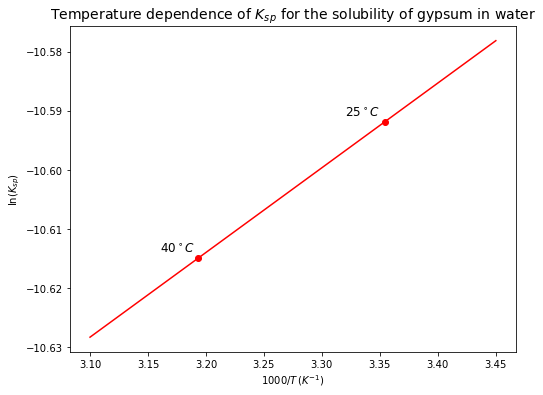

In [6]:
# Ksp values at 25 and 40 C
T = np.array([25+273.15, 40+273.15])
K_sp = np.array([10**-4.60, 10**-4.61])
# axis
xi = 1000/T
yi = np.log(K_sp)

# draw a line to fit the two data points
plt.figure(figsize=(8,6))
poly_coeffs=np.polyfit(xi, yi, 1)
p1 = np.poly1d(poly_coeffs)
plt.plot([3.1, 3.45], [p1(3.1), p1(3.45)], 'r')  # linear fit
plt.plot(xi, yi, 'ro')  # data points
plt.xlabel('$1000/T\,(K^{-1})$')
plt.ylabel('$\ln (K_{sp})$')
plt.title('Temperature dependence of $K_{sp}$ for the solubility of gypsum in water', fontsize=14)
plt.text(3.16, -10.614, "$40^\circ C$", fontsize=12)
plt.text(3.32, -10.591, "$25^\circ C$", fontsize=12)

(iii) By how much did $K_{sp}$ change as temperature increased? Is that a small change or a large change? What do you conclude about the solubility of gypsum when temperature increases? 

The change in $\log(K_{sp})$ is only $0.01$. This is a small change (~$2\%$). This result indicate that solubility decreases slightly with increasing temperature, but as said previously, this effect is small. Note that this is not necessarily representative of all solubility reactions. Other reactions can show very large sensitivities to temperature. 

(c) One measures a particular solution of gypsum and find that the dissolved calcium activity is $a_{Ca^{2+}} = 10^{-3}\,mol/L$ and that of sulfate is $a_{SO_4^{2-}} = 10^{-2}\,mol/L$. At $25^\circ C$, is that solution over or undersaturated with respect to gypsum? Will gypsum precipitate into a solid, or will the solid keep dissolving?

(i) Write the reaction quotient for this reaction.

The reaction quotient (for a reaction not at equilibrium) can be written as: 

$${Q_{sp}}^o = \frac{a_{Ca^{2+}} \cdot a_{SO_4^{2-}} \cdot a_{H_2O}^2}{a_{CaSO_4 \cdot 2H_2O}}$$

(ii) Take the ratio between the reaction quotient ($Q$) and the equilibrium constant ($K_{eq}$), which you wrote down in part a-i above. Recall that the activities of pure liquids and pure solids are equal to $1$. How does that ratio between $Q/K_{eq}$ help you address the question to know if the solution is over or undersaturated? Perform the calculation and provide an argument for why gypsum will dissolve under these conditions. 

We know that the equilibrium constant is given by: 

$${K_{sp}}^o = \frac{a_{Ca^{2+}} \cdot a_{SO_4^{2-}} \cdot a_{H_2O}^2}{a_{CaSO_4 \cdot 2H_2O}}$$

Since the activity of pure solids and pure liquids are 1 by definition, $a_{CaSO_4 \cdot 2H_2O} = 1$ and $a_{H_2O}^2 = 1$.

To know if the solution is at equilibrium, we can take the ratio between the two constants:

$$\frac{{Q_{sp}}^o}{{K_{sp}}^o} = \frac{\left(a_{Ca^{2+}} \cdot a_{SO_4^{2-}}\right)_Q}{\left(a_{Ca^{2+}} \cdot a_{SO_4^{2-}}\right)_{K_{eq}}}$$

In this equation, the numerator is sometimes called the “ion activity product, IAP”. If the ratio $\frac{{Q_{sp}}^o}{{K_{sp}}^o}>1$, then the activity of the dissolved species is too high and they will precipitate (as the solution moves towards equilibrium). In contrast, if $\frac{{Q_{sp}}^o}{{K_{sp}}^o}<1$ then
gypsum will dissolve towards equilibrium. 

Numerically,

$$\frac{{Q_{sp}}^o}{{K_{sp}}^o} = \frac{10^{-3} \cdot 10^{-2}}{10^{-4.60}} = 10^{-0.4} < 1$$

This number is less than 1, so the solution is undersaturated with respect to gypsum and it will therefore dissolve. 

## References

- Lecture slide and Practical for Lecture 3 of the Low-Temperature Geochemistry module
- Eby, G. N. (2004). Principles of environmental geochemistry. Thomson-Brooks/Cole.